In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
net = cv2.dnn.readNetFromTensorflow('../models/graph_opt.pb')

In [ ]:
inWidth = 368
inHeight = 368
thr = 0.2

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
                "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"], 
                ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"], 
                ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"], 
                ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"], 
                ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

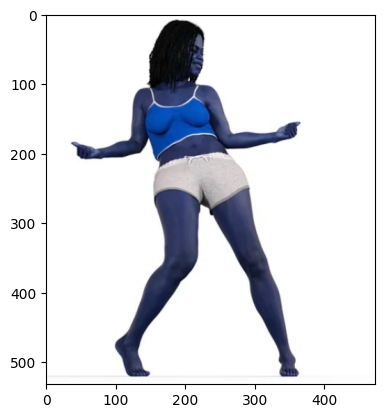

In [ ]:
img = cv2.imread('../assets/1.jpeg')
plt.imshow(img)

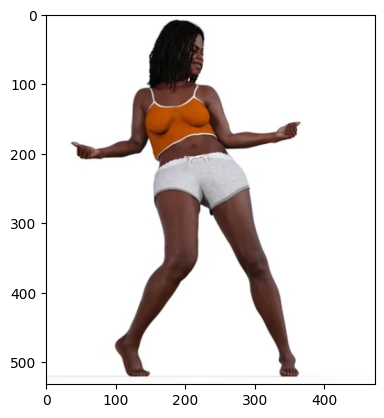

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
def pose_estimator(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    net.setInput(cv2.dnn.blobFromImage(
        frame, 1.0, 
        (inWidth, inHeight), 
        (127.5, 127.5, 127.5), 
        swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :] # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1]) # net.getLayer(net.getLayerId('detection_out')).shapes[1]

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponding body's part
        heatMap = out[0, i, :, :]

        # Originally, we try to find all the local maximums. To simplify a sample
        # we just find a global one. However only a single pose at the same time
        # could be detected this way.   
        _, conf, _, point = cv2.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]

        # Add a point if it's confidence is higher than threshold.
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv2.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv2.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    t, _ = net.getPerfProfile()
    freq = cv2.getTickFrequency() / 1000
    # cv2.putText(frame, '%.2fms' % (t / freq), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0))
    print('%.2fms' % (t / freq))

    return points, frame

127.20ms


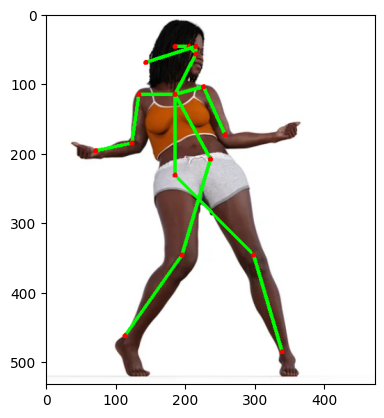

In [ ]:
img = cv2.imread('../assets/1.jpeg')
result = pose_estimator(img)
plt.imshow(cv2.cvtColor(result[1], cv2.COLOR_BGR2RGB))

In [ ]:
cap = cv2.VideoCapture(0) # 0 for web camera and inter video file path for video file
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 800)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 800)
# cap.set(cv2.CAP_PROP_FPS, 10) # frame per second

if not cap.isOpened():
    cap.release()
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while cv2.waitKey(1) < 0:
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break

    _, frame = pose_estimator(frame)

    cv2.imshow('OpenPose using OpenCV', frame)

120.64ms
142.09ms
144.10ms
134.64ms
132.90ms
132.89ms
133.44ms
127.03ms
138.08ms
124.28ms
139.12ms
144.49ms
147.94ms
144.13ms
144.54ms
168.86ms
137.90ms
133.75ms
155.44ms
136.20ms
132.96ms
125.62ms
157.36ms
156.43ms
152.58ms
126.47ms
138.86ms
128.26ms
143.42ms
133.43ms
137.59ms
128.35ms
127.17ms
130.97ms
132.33ms
132.58ms
134.41ms
131.47ms
131.62ms
130.78ms
137.20ms
144.64ms
150.98ms
149.60ms
153.44ms
147.41ms
132.34ms
130.49ms
137.64ms
143.39ms
149.86ms
143.78ms
140.21ms
134.21ms
145.92ms
140.88ms
138.91ms
138.17ms
148.17ms
150.36ms
146.78ms
145.07ms
135.99ms
131.44ms
134.45ms
140.49ms
139.02ms
146.57ms
141.82ms
141.95ms
144.13ms
151.31ms
139.29ms
126.77ms
130.08ms
135.55ms
142.71ms
129.66ms
129.09ms
133.20ms
128.70ms
133.10ms
134.01ms
127.11ms
132.15ms
125.54ms
126.46ms
127.51ms
129.65ms
130.08ms
130.13ms
135.17ms
143.90ms
138.98ms
133.70ms
124.57ms
128.37ms
130.96ms
132.66ms
128.21ms
132.49ms
132.25ms
132.17ms
127.67ms
138.02ms
132.24ms
137.78ms
139.40ms
144.22ms
139.44ms
139.13ms
1

: 